# Занятие 4. Задача классификации

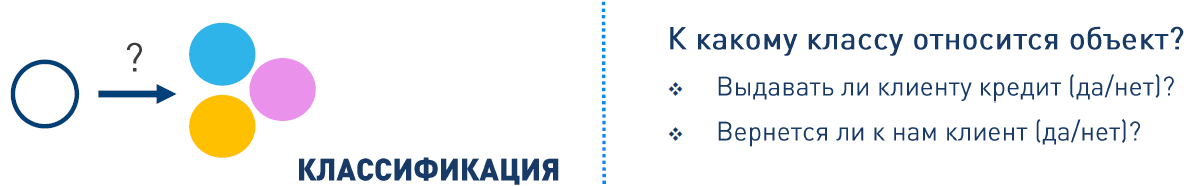

## Постановка задачи

**Задача классификации** — задача, в которой имеется множество объектов (ситуаций), разделенных некоторым образом на классы. Задано конечное множество объектов, для которых известно, к каким классам они относятся. 

**Что тогда классифицировать?** <br>
Нужно придумать правило для классификации новых наблюдений.

**Вход модели**: Обучающая выборка (признаки + известные классы)
    
**Выход модели**: Классификатор (алгоритм для новых наблюдений)

**Типы классификации**

* Двухклассовая (бинарная) классификация. Наиболее простой в техническом отношении случай, который служит основой для решения более сложных задач. 
* Многоклассовая классификация. Когда число классов достигает многих тысяч (например, при распознавании иероглифов или слитной речи), задача классификации становится существенно более трудной.

## Общий алгоритм решения задачи

1. Выбор метода моделирования
2. Выбор метрики оценки качества модели
3. Подгонка, обучение модели (расчет параметров)
4. Анализ точности и значимости результата

Обучение модели в общем виде выглядит так:
![Обучение](Fitted.png)

## Методы решения

К числу распространенных методов решения задачи классификации относятся:

* логистическая регрессия
* деревья решений
* ансамбли моделей
* нейронные сети
* и пр.

## Метрики качества

### Accuracy

- Accuracy - доля объектов, в которых предсказанный класс совпал с реальным
- Можно интерпретировать как вероятность правильно предсказать класс на случайно выбранном объекте
- Не репрезентативна при несбалансированных классах

$Accuracy = \frac{P}{N}$

$P$  – количество элементов, по которым классификатор принял правильное решение, <br>
$N$ – размер обучающей выборки.

### Confusion matrix

![Confusion matrix](https://www.machinelearningmastery.ru/img/0-31734-437976.png)

* TP  — истино-положительное решение
* TN — истино-отрицательное решение
* FP — ложно-положительное решение
* FN — ложно-отрицательное решение

### Precision (точность)

- Precision - количество правильно предсказанных объектов класса деленное на количество  объектов, которым этот класс был предсказан

- Можно интепретировать как вероятность того, что объект, отнесенный моделью к классу, окажется объектом этого класса.

$Precision = \frac{TP}{TP+FP}$

### Recall (полнота)

- Recall - количество правильно предсказанных объектов класса деленное на количество  объектов этого класса

- Можно интепретировать как вероятность того, что объект  класса будет отнесен моделью к этому классу

$Recall = \frac{TP}{TP+FN}$

### F-мера

- $f$ мера - способ скомбинировать recall и precision в одну метрику

- $f_1 = \frac{2~precsion~х~recall}{precision~+~recall}$

- Имеет обобщение для учёта важности precision и recall $f_{\beta} = \frac{(1+\beta^2)~precsion~х~recall}{\beta^2 precision~+~recall}$ 

$0<\beta<1$ - предпочтение отдается точности (Precision)

$\beta >1$ - больший вес преобретает полнота (Recall)

### Classification report

Быстрый способ посмотреть сразу на все эти метрики 

support - количество объектов данного класса

![Classification report](https://i.stack.imgur.com/LIWH1.jpg)

## Метрики качества оценки принадлежности

###  PR curve и PR-AUC

- $Precision = \frac{TP}{TP+FP}$
- $Recall = \frac{TP}{TP+FN}$

PR кривая - это набор точек $(P, R)$, полученный варьированием порога
PR-AUC - Площадь под PR-кривой

### ROC curve и ROC-AUC

- TPR - True Positive Rate - $\frac{TP}{TP + FN}$

- FPR - False Positive Rate - $\frac{FP}{FP + TN}$

ROC кривая - это набор точек $(FPR, TPR)$, полученный варьированием порога

ROC-AUC - Площадь под ROC-кривой

## Переобучение

**Как бороться с переобучением?**


![TrainTestCV](TrainTestCV.png)

## Логистическая регрессия

Хотим попробовать применить линейную модель для задачи классификации. То есть
$$\beta_0 + \beta_1 x_{i1} + \ldots + \beta_k x_{ik} = y_i,$$
где $X_i = (x_{i1}, \ldots, x_{ik})$ - строка с данными, $y_i\in\{0, 1\}$, $\beta_0, \ldots, \beta_k$ - неизвестные коэффициенты.
Проблема в том, что слева стоит непрерывная функция по $x$, а справа - дискретная переменная. Кроме того, при больших значениях $x$ функция слева будет гарантированно давать большие значения. Так что применить модель прямо в таком виде - плохая идея.

Введём логистическую функцию (сигмоид) $\sigma(x)=\frac{1}{1+e^{-x}}$.

In [2]:
# Загрузим сразу все библиотеки

import pandas as pd # Для работы с табличными данными
import numpy as np # Для работы с массивами

import matplotlib # Для отрисовки графиков
import matplotlib.pyplot as plt # Для отрисовки графиков

# выбор темы картинок (необязательная строчка)
matplotlib.style.use('ggplot')
# Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline

In [ ]:
x = np.array(np.arange(-10, 10, 0.5))
y = 1. / (1 + np.exp(-x))
plt.plot(x, y)
plt.title(u'Логистическая функция')

Заметим, что $\sigma: \mathbb{R}\rightarrow (0, 1)$.

Применим к левой части логистическую функцию и будем решать задачу в виде
$$\sigma\left(\beta_0 + \beta_1 x_{i1} + \ldots + \beta_k x_{ik}\right) = y_i.$$

Теперь слева у нас всегда будут получаться значения из $(0, 1)$, и это можно интерпретировать как вероятности принадлежности классу: если меньше 0.5, то класс 0, иначе - класс 1.

Но теперь у нас пропадает аналитическое решение, которое было для линейной регрессии. Теперь придётся решать задачу оптимизации. Градиентный спуск (или другие методы) в помощь!

Логистическая модель в sklearn реализована в классе ```LogisticRegression``` библиотеки ```linear_model```.

## Кейс "Кредитный скоринг"

### Описание данных

Рассмотрим задачу кредитного скоринга, рассматривая ее как задачу классификации.

У нас имеются исторические данные о выдаче кредита, в которых есть следующие столбцы:
* кредит - вернул ли клиент кредит (да/нет), 
* проф - класс профессии (упорядоченный с точки зрения платежеспособности),
* тип\_выд\_зп - способ выдачи зарплаты (ежемесячно или еженедельно),
* взр\_сег - возраст разбитый по сегментам,
* кр\_карта - есть или нет кредитная карта.

### Постановка задачи

Необходимо построить классификатор, который для каждого нового клиента будет давать рекомендацию по выдаче ему кредита (выдавать или не выдавать). Использовать логистическую регрессию.

### Загрузка данных и их обработка

Перед загрузкой данных импортируем нужные библиотеки:

In [ ]:
# import pandas as pd # Для работы с табличными данными

# import matplotlib # Для отрисовки графиков
# import matplotlib.pyplot as plt # Для отрисовки графиков

# # выбор темы картинок (необязательная строчка)
# matplotlib.style.use('ggplot')
# # Эта строчка нужна для того, чтобы картинки отображались в ячейках
# %matplotlib inline

Загрузим данные в переменную df_credit:

В строчке выше использовали метод .read_csv(), который позволяет считывать данные в формат DataFrame.
Атрибуты, которые мы использовали:
    
* sep = ';' - указали какой разделитель в файле;
* encoding = 'cp1251' - для корректного отображения кириллицы.

In [3]:
df_credit = pd.read_csv('credit.csv', sep = ';', encoding = 'cp1251')
df_credit.head()

,кредит,проф,тип_выд_зп,взр_сег,кр_карта
0,1,2,2,2,1
1,0,2,1,2,0
2,0,4,1,1,1
3,1,2,2,2,0
4,1,3,2,1,0


In [ ]:
df_credit.tail()

In [ ]:
df_credit.shape

In [ ]:
df_credit.info()

In [ ]:
df_credit.describe()

### Построение модели

Отделим в имеющихся данных правильный ответ (вернул ли клиент кредит) от факторов, которые влияют на наше решение (класс профессии, з/п, возраст, наличие кредитной карты):

In [ ]:
# Правильный ответ записываем в вектор y (вернул ли клиент кредит)
y = df_credit['кредит']
# Удаляем колонку с правильным ответом - оставшиеся колонки - это факторы
X = df_credit.drop('кредит', axis = 1) # Удаляем столбец

In [ ]:
X.head() 

In [ ]:
y.head()

Чтобы избежать переобучения и чтобы была возможность оценки точности построенной модели, разделим наши данные на тренировочную (обучающую) и тестовую выборку:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
# random_state = 42 - для воспроизводимости результатов на разных компьютерах (деление происходит случайным образом)
# test_size = 0.2 - объем тестовой выборки

In [ ]:
y_test.head()

In [ ]:
X_test.head()

In [ ]:
y_train.tail()

In [ ]:
X_train.tail()

Поставленную задачу решим с помощью логистической регрессии.

Документация здесь:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression(
    # метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga - для больших.
    # Варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver = 'liblinear',
    # норма для регуляризации. Варианты: 'l1', 'l2', 'elasticnet', 'none'
    penalty = 'l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C = 1,
    # параметр для остановки поиска решения.
    tol = 1e-4,
    # Опция для задачи мультиклассификации, когда есть несколько классов.
    multi_class = 'ovr'
    )

In [ ]:
model_lg.fit(X_train, y_train)

In [ ]:
y_pred_lg = model_lg.predict(X_test)

In [ ]:
pd.DataFrame({'Реальные значения': y_test, 'Предсказанные значения': y_pred_lg }).head(10)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_lg))

In [ ]:
model_lg.coef_

In [ ]:
model_lg.intercept_ 

In [ ]:
new_item = [2, 2, 4, 1]
model_lg.predict([new_item])

## Дерево решений

**Пример дерева:**
    
![Дерево](https://loginom.ru/sites/default/files/blogpost-files/activation-function.svg)

**Задача**: хотим научиться предсказывать страховать ли авто.

Есть **два класса**: страховать, не страховать

В каждой внутренней вершине записано **условие перехода** к следующей вершине.

В каждом **листе** записан прогноз (класс).

**Условия** – находится ли значение некоторого признака i левее, чем некоторый порог t? Если меньше порога – идем влево, больше порога – идем вправо.

Выбираем **критерий i и порог t** так, чтобы взвешенный разброс ответов в каждом поддереве был минимальным. Математически это определяет:

* Критерий Джинни: $H(X) = \sum_{k=1}^K p_k\cdot (1 - p_k)$
* Энтропийный критерий: $H(X) = -\sum_{k=1}^K p_k\cdot ln{p_k}$

где $p_k$ - доля $k$-ого объекта

**Прогноз** – наиболее популярный (часто встречающийся) ответ в листе.

**Критерий останова:**

* В вершину попало ≤ n объектов (рекомендация: n = 5). Если n = 1 – переобучение.
* Задать ограничение на глубину дерева (применяется в ансамблях моделей).

**Плюсы метода**:
	Быстрое построение модели, легкая интерпретация

**Минусы метода**:
	Низкая точность

Деревья решений могут быть использованы для **оценки важности переменных** при классификации. 

Во время процесса построения модели для каждого элемента тренировочного набора определяется out-of-bag-ошибка (ошибка на неотобранных образцах). Затем такая ошибка усредняется по всему случайному лесу для каждого фактора.

## Кейс "Кредитный скоринг" (продолжение)

### Описание данных

Данные те же.

### Постановка задачи

Необходимо построить классификатор, который для каждого нового клиента будет давать рекомендацию по выдаче ему кредита (выдавать или не выдавать). Использовать дерево решений.

### Загрузка данных и их обработка

Перед загрузкой данных импортируем нужные библиотеки:

In [ ]:
# import pandas as pd # Для работы с табличными данными

# import matplotlib # Для отрисовки графиков
# import matplotlib.pyplot as plt # Для отрисовки графиков

# # выбор темы картинок (необязательная строчка)
# matplotlib.style.use('ggplot')
# # Эта строчка нужна для того, чтобы картинки отображались в ячейках
# %matplotlib inline

Данные загружны в переменную df_credit:

In [4]:
df_credit.head()

,кредит,проф,тип_выд_зп,взр_сег,кр_карта
0,1,2,2,2,1
1,0,2,1,2,0
2,0,4,1,1,1
3,1,2,2,2,0
4,1,3,2,1,0


In [5]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   кредит      323 non-null    int64
 1   проф        323 non-null    int64
 2   тип_выд_зп  323 non-null    int64
 3   взр_сег     323 non-null    int64
 4   кр_карта    323 non-null    int64
dtypes: int64(5)
memory usage: 12.7 KB


### Построение модели

Алгоритм в общем-то тот же, что и с логистической регрессией. 

Отделим в имеющихся данных правильный ответ (вернул ли клиент кредит) от факторов, которые влияют на наше решение (класс профессии, з/п, возраст, наличие кредитной карты). Вообще, мы это уже сделали при логистической регрессии, но сделаем еще раз, чтобы запомнить последовательность действий:

In [6]:
# Правильный ответ записываем в вектор y (вернул ли клиент кредит)
y = df_credit['кредит']
# Удаляем колонку с правильным ответом - оставшиеся колонки - это факторы
X = df_credit.drop('кредит', axis = 1) # Удаляем столбец

In [7]:
X.head() 

,проф,тип_выд_зп,взр_сег,кр_карта
0,2,2,2,1
1,2,1,2,0
2,4,1,1,1
3,2,2,2,0
4,3,2,1,0


In [8]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: кредит, dtype: int64

Чтобы избежать переобучения и чтобы была возможность оценки точности построенной модели, разделим наши данные на тренировочную (обучающую) и тестовую выборку:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
# random_state = 42 - для воспроизводимости результатов на разных компьютерах (деление происходит случайным образом)
# test_size = 0.2 - объем тестовой выборки

In [ ]:
y_test.head()

In [ ]:
X_test.head()

In [ ]:
y_train.tail()

In [ ]:
X_train.tail()

Поставленную задачу решим с помощью дерева решений.

Документация здесь: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Импортируем метод

# Инициализируем модель
model_dt = DecisionTreeClassifier(random_state = 42, criterion = 'gini', max_depth = 3, min_samples_leaf = 5)

# random_state = 42, для воспроизводимости результатов 
# criterion = 'gini', критерий разбиения ('gini' или 'entropy')
# max_depth = 3, максимальная глубина дерева
# min_samples_leaf = 5, минимальное число элементов в листе (может быть долей)

# Обучаем модель
model_dt.fit(X_train, y_train)

Для интерпретации получившейся модели удобно изобразить её в виде дерева решающих правил. Для этого в ```sklearn.tree``` предусмотрена функция ```export_graphviz```. Однако неудобство её в том, что она выдаёт результат в виде файла векторной графики ```.dot```, который нужно дополнительно преобразовать в привычный формат (например, в ```.png```).

In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz
from graphviz import Source

In [ ]:
# pip install graphviz
# conda install graphviz

In [ ]:
graph = Source(tree.export_graphviz(model_dt, proportion = True, filled = True, impurity = True, node_ids = True, precision = 1, feature_names = X.columns))
graph

# proportion = True - Показывать доли каждого класса в узлах (а не количество)
# filled = True - раскрашивать узлы в цвет преобладающего класса
# impurity = True - показывать значение impurity для каждого узла (gini)
# node_ids = True - показывать номера узлов
# precision = 1 - Число точек после запятой для отображаемых дробей
# feature_names = X.columns - задать названия факторов
# rotate = True - Повернуть дерево на 90 градусов (вертикальная ориентация)

In [ ]:
# # Сохраняем дерево в формате .png
# png_bytes = graph.pipe(format='png')
# with open('tree.png','wb') as f:
#     f.write(png_bytes)

In [ ]:
tree.export_graphviz(model_dt, 'tree.dot', proportion = True, filled = True, impurity = True, node_ids = True, precision = 1, feature_names = X.columns)

Модель позволяет оценить ценность каждого фактора в смысле её эффективности для разбиения (Gini importance):

In [ ]:
pd.DataFrame({'feature': X.columns,
              'importance': model_dt.feature_importances_}).sort_values('importance', ascending = False)

In [ ]:
# Отображение ценности в графическом виде
pd.Series(model_dt.feature_importances_, index = X.columns).nlargest(4).plot(kind='barh');

In [ ]:
X_test.head()

У данной модели также реализован метод predict, который позволяет получить предсказания классов для входного списка элементов, представленных в пространстве тех же самых признаков (то есть подаём на вход матрицу).

In [ ]:
# Строим предсказание модели на тестовом множестве
y_pred_dt = model_dt.predict(X_test)

In [ ]:
pd.DataFrame({'Реальные значения': y_test, 'Предсказанные значения': y_pred_dt}).head(10)

Не забываем про оценку качества:

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_dt))

In [ ]:
# Предсказание класса для новых элементов
new_item = [2, 2, 4, 1]
model_dt.predict([new_item])

## Случайный лес

**Деревья решений** - хороший инструмент, поскольку позволяет очень просто интерпретировать полученные результаты. Однако не всегда полученная точность модели удовлетворяет исследователя.

В таком случае,задачу можно решить более эффективным (с точки зрения показателей точности) методом - Random forest.

**Random forest** (Случайный лес) — метод, в основе которого лежит использование комитета (ансамбля) деревьев принятия решений. 

**Все деревья строятся по следующей схеме**:

* Берется подвыборка обучающей выборки, по ней строится дерево

* Для построения каждого ветвления в дереве просматриваем набор случайных признаков

* Выбираем наилучшие признак и ветвление по нему. Дерево строится до определенной высоты дерева (не всегда)

![Случайный лес](https://cf2.ppt-online.org/files2/slide/f/fYVL69pzlGjN2CF7EqSwmUe1gDxAZ8TbJiKOHMXIcu/slide-26.jpg)

**Плюсы метода**:
	Высокое качество результата, не требуется тестовая выборка

**Минусы метода**:
	Сложная интерпретация модели

Случайные леса также могут быть использованы для **оценки важности переменных** при классификации. 

## Кейс "Кредитный скоринг" (продолжение)

### Описание данных

Данные те же.

### Постановка задачи

Необходимо построить классификатор, который для каждого нового клиента будет давать рекомендацию по выдаче ему кредита (выдавать или не выдавать). Использовать случайный лес.

### Загрузка данных и их обработка

Данные загружны в переменную df_credit:

In [ ]:
df_credit.head()

### Построение модели

В переменных X_train, X_test, y_train, y_test уже лежит то, что нам нужно.

Настроим модель случайных лесов для наших данных.

Документация здесь: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state = 42, n_estimators = 100, criterion ='gini', max_depth = 3)

# n_estimators = 100, число деревьев в лесу
# oob_score = True, вычислять out-of-bag ошибку

In [ ]:
model_rf.fit(X_train, y_train)

In [ ]:
y_pred_rf = model_rf.predict(X_test)

In [ ]:
pd.DataFrame({'Реальные значения': y_test, 'Предсказанные значения': y_pred_rf}).head(10)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_rf))

Точность и полнота выше, чем у одного дерева.

In [ ]:
pd.DataFrame({'feature': X.columns,
              'importance': model_rf.feature_importances_}).sort_values('importance', ascending = False)

In [ ]:
pd.Series(model_rf.feature_importances_, index = X.columns).nlargest(6).plot(kind = 'barh')

In [ ]:
# Предсказание класса для новых элементов
new_item = [2, 2, 4, 1]
model_rf.predict([new_item])

### Кейс "Швейцарские банкноты"

**Описание данных**

Набор данных о поддельных и настоящих купюрах, а именно о размерах банкнот.

Данные лежат в файле "swiss_bank_notes.csv".

**Постановка задачи**

Научиться по размерю купюр предсказывать настоящая купюра или фальшивая.

**Загрузка данных и их обработка**

**Построение модели**

<font color='blue'>**Задание 1.**</font>

1. Выберите метрику качества
2. Решите задачу тремя методами.
3. Сравните результаты и выберите наилучшую модель.

### Кейс "Предсказание доходов"

**Описание данных**

Даны результаты переписи населения.

Полное описание факторов: https://archive.ics.uci.edu/ml/datasets/Adult

**Постановка задачи**

Нужно предсказать доход человека (больше $50000 или меньше) по результатам переписи населения.<br>

Полное описание датасета: https://archive.ics.uci.edu/ml/datasets/Adult

**Загрузка данных и их обработка**

In [ ]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('adult.data', header = None, names = columns, na_values = ' ?')

# Удаляем колонку education (потому что есть уже закодированная колонка education-num)
df = df.drop('education', axis = 1)

# Кодируем отклик в бинарные значения
df['income'] = df['income'].map({' <=50K': 0, ' >50K': 1})

# удаляем строки с NA значениями
df = df.dropna()

test = pd.read_csv('adult.test', header = None, names= columns, na_values=' ?', skiprows=1)
test = test.drop('education', axis=1)
test['income'] = test['income'].map({' <=50K.': 0, ' >50K.': 1})
test = test.dropna()

In [ ]:
df.head()

In [ ]:
# Посчитаем распределение классов в отклике
df['income'].value_counts(normalize = True)

In [ ]:
# Датасет уже разбит на train/test
# Бинаризуем категориальные признаки (эта операция ещё называется one-hot encoding)

X_train = pd.get_dummies(df).drop('income', axis = 1)
y_train = df['income']

X_test = pd.get_dummies(test).drop('income', axis = 1)
y_test = test['income']

In [ ]:
X_test.head()

One-hot encoding мы сделали с помощью pd.get_dummies: <br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

Есть еще второй способ: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

После бинаризации категориальных признаков окажется, что в обучающем множестве содержится на одну колонку больше. Это от того, что в тестовой выборке нет ни одного представителя Голландии в колонке ```native-county```.

In [ ]:
print (len(X_train.columns))
print (len(X_test.columns))

# Приводим множество названий колонок к типу set, находим разность двух множеств
print (set(X_train.columns) - set(X_test.columns))
print (set(X_test.columns) - set(X_train.columns))

Чтобы полечить это, создадим полный список всех колонок (из трейна и из теста) и переиндексируем колонки в соответствии с этим списком. В результате в колонке ```native-country_ Holand-Netherlands``` в тесте появятся NaN-значения, которые мы заменим на нули.

In [ ]:
columns = set(X_train.columns) | set(X_test.columns)
X_train = X_train.reindex(columns = columns).fillna(0)
X_test = X_test.reindex(columns = columns).fillna(0)

Теперь колонки в трейне и в тесте должны быть идентичными. В том числе идентичным должен быть и порядок колонок. На всякий случай убедимся в этом. 

In [ ]:
# Команда all проверяет, все ли значения из входного списка равны True
all(X_train.columns == X_test.columns)

**Построение модели**

<font color='blue'>**Задание 2.**</font>

1. Выберите метрику качества
2. Решите задачу тремя методами.
3. Сравните результаты и выберите наилучшую модель.